In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
data=pd.read_csv('C:/Users/91939/Downloads/JH (SER) 23-24.csv')

In [5]:
data=data.rename(columns={'Unnamed: 0':'start'})

In [6]:
data

,start,105-120,Unnamed: 2,4/1/2023,4/2/2023,4/3/2023,4/4/2023,4/5/2023,4/6/2023,4/7/2023,...,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Feb-24.1,Apr'23-Jun'23,Jul'23-Sep'23,Oct'23-Dec'23,Jan'24-Feb'24
0,NaN,120-130,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW)
1,NaN,>130,NaN,Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0:00,0:15,1,72.85,72.26,62.00,59.49,71.06,62.53,46.27,...,,,,,,,72.45,72.92,,
3,0:15,0:30,2,71.39,69.24,67.91,73.38,76.56,57.31,40.36,...,,,,,,,72.43,71.30,,
4,0:30,0:45,3,72.34,68.78,63.28,82.18,91.46,63.36,57.99,...,,,,,,,71.44,73.27,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23:45,0:00,96,71.21,66.94,58.98,75.69,67.83,46.74,44.15,...,,,,,,,70.74,71.29,,
98,NaN,NaN,Total(MU's),1.75251345,1.8704907,1.82687345,1.83822345,1.7628417,1.494578,1.50818725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.809536,1.770909,0.000000,0.000000
99,NaN,NaN,Average (MW),73.02,77.94,76.12,76.59,73.45,62.27,62.84,...,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,75.40,73.79,#DIV/0!,#DIV/0!
100,NaN,NaN,Min (MW),59.33,62.83,58.98,59.49,50.79,42.20,40.36,...,0.00,0.00,0.00,0.00,0.00,0.00,69.44,67.30,0.00,0.00


In [7]:
data=data.T

In [8]:
data=data.reset_index()

In [9]:
data=data.rename(columns={'index':'dates'})
data.drop(data.index[[0,1]],axis=1)

,dates,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
0,start,0:00,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,...,22:30,22:45,23:00,23:15,23:30,23:45,NaN,NaN,NaN,NaN
1,105-120,0:15,0:30,0:45,1:00,1:15,1:30,1:45,2:00,2:15,...,22:45,23:00,23:15,23:30,23:45,0:00,NaN,NaN,NaN,NaN
2,Unnamed: 2,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,Total(MU's),Average (MW),Min (MW),Max(MW)
3,4/1/2023,72.85,71.39,72.34,72.24,79.88,75.49,67.49,63.47,64.73,...,60.48,72.01,61.78,66.07,67.83,71.21,1.75251345,73.02,59.33,89.62
4,4/2/2023,72.26,69.24,68.78,92.35,89.71,80.69,82.79,81.90,86.95,...,65.29,68.91,68.96,72.94,67.48,66.94,1.8704907,77.94,62.83,99.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Feb-24.1,,,,,,,,,,...,,,,,,,0.000000,#DIV/0!,0.00,0.00
383,Apr'23-Jun'23,72.45,72.43,71.44,73.39,73.26,71.45,73.62,72.38,71.62,...,72.74,73.51,73.38,72.62,70.17,70.74,1.809536,75.40,69.44,83.19
384,Jul'23-Sep'23,72.92,71.30,73.27,73.54,74.62,72.32,70.61,72.71,74.29,...,73.23,71.81,71.58,72.97,71.30,71.29,1.770909,73.79,67.30,80.96
385,Oct'23-Dec'23,,,,,,,,,,...,,,,,,,0.000000,#DIV/0!,0.00,0.00


In [10]:
newdata=data.drop(data.index[[1,2]],axis=0)
newdata

,dates,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100,101
0,start,NaN,NaN,0:00,0:15,0:30,0:45,1:00,1:15,1:30,...,22:30,22:45,23:00,23:15,23:30,23:45,NaN,NaN,NaN,NaN
3,4/1/2023,Monday,Actual(MW),72.85,71.39,72.34,72.24,79.88,75.49,67.49,...,60.48,72.01,61.78,66.07,67.83,71.21,1.75251345,73.02,59.33,89.62
4,4/2/2023,Tuesday,Actual(MW),72.26,69.24,68.78,92.35,89.71,80.69,82.79,...,65.29,68.91,68.96,72.94,67.48,66.94,1.8704907,77.94,62.83,99.18
5,4/3/2023,Wednesday,Actual(MW),62.00,67.91,63.28,71.07,81.84,90.69,94.31,...,74.81,76.38,72.52,69.68,59.37,58.98,1.82687345,76.12,58.98,96.01
6,4/4/2023,Thursday,Actual(MW),59.49,73.38,82.18,84.02,84.93,83.86,80.47,...,80.50,72.78,73.07,74.30,68.67,75.69,1.83822345,76.59,59.49,92.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Feb-24.1,Average Actual (MW),NaN,,,,,,,,...,,,,,,,0.000000,#DIV/0!,0.00,0.00
383,Apr'23-Jun'23,Average Actual (MW),NaN,72.45,72.43,71.44,73.39,73.26,71.45,73.62,...,72.74,73.51,73.38,72.62,70.17,70.74,1.809536,75.40,69.44,83.19
384,Jul'23-Sep'23,Average Actual (MW),NaN,72.92,71.30,73.27,73.54,74.62,72.32,70.61,...,73.23,71.81,71.58,72.97,71.30,71.29,1.770909,73.79,67.30,80.96
385,Oct'23-Dec'23,Average Actual (MW),NaN,,,,,,,,...,,,,,,,0.000000,#DIV/0!,0.00,0.00


In [11]:
newdata=newdata.set_index('dates')
newdata=newdata.T
newdata

dates,start,4/1/2023,4/2/2023,4/3/2023,4/4/2023,4/5/2023,4/6/2023,4/7/2023,4/8/2023,4/9/2023,...,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Feb-24.1,Apr'23-Jun'23,Jul'23-Sep'23,Oct'23-Dec'23,Jan'24-Feb'24
0,NaN,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,...,Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW),Average Actual (MW)
1,NaN,Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),Actual(MW),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0:00,72.85,72.26,62.00,59.49,71.06,62.53,46.27,57.88,57.48,...,,,,,,,72.45,72.92,,
3,0:15,71.39,69.24,67.91,73.38,76.56,57.31,40.36,60.11,51.97,...,,,,,,,72.43,71.30,,
4,0:30,72.34,68.78,63.28,82.18,91.46,63.36,57.99,62.55,52.06,...,,,,,,,71.44,73.27,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23:45,71.21,66.94,58.98,75.69,67.83,46.74,44.15,54.46,71.53,...,,,,,,,70.74,71.29,,
98,NaN,1.75251345,1.8704907,1.82687345,1.83822345,1.7628417,1.494578,1.50818725,1.40122625,1.43213075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.809536,1.770909,0.000000,0.000000
99,NaN,73.02,77.94,76.12,76.59,73.45,62.27,62.84,58.38,59.67,...,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,75.40,73.79,#DIV/0!,#DIV/0!
100,NaN,59.33,62.83,58.98,59.49,50.79,42.20,40.36,43.97,42.00,...,0.00,0.00,0.00,0.00,0.00,0.00,69.44,67.30,0.00,0.00


In [12]:
newdata=newdata.drop(newdata.index[[0,1]],axis=0)
newdata

dates,start,4/1/2023,4/2/2023,4/3/2023,4/4/2023,4/5/2023,4/6/2023,4/7/2023,4/8/2023,4/9/2023,...,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Feb-24.1,Apr'23-Jun'23,Jul'23-Sep'23,Oct'23-Dec'23,Jan'24-Feb'24
2,0:00,72.85,72.26,62.00,59.49,71.06,62.53,46.27,57.88,57.48,...,,,,,,,72.45,72.92,,
3,0:15,71.39,69.24,67.91,73.38,76.56,57.31,40.36,60.11,51.97,...,,,,,,,72.43,71.30,,
4,0:30,72.34,68.78,63.28,82.18,91.46,63.36,57.99,62.55,52.06,...,,,,,,,71.44,73.27,,
5,0:45,72.24,92.35,71.07,84.02,79.58,62.83,58.34,67.74,47.13,...,,,,,,,73.39,73.54,,
6,1:00,79.88,89.71,81.84,84.93,87.29,64.85,63.52,56.38,49.86,...,,,,,,,73.26,74.62,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,23:45,71.21,66.94,58.98,75.69,67.83,46.74,44.15,54.46,71.53,...,,,,,,,70.74,71.29,,
98,NaN,1.75251345,1.8704907,1.82687345,1.83822345,1.7628417,1.494578,1.50818725,1.40122625,1.43213075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.809536,1.770909,0.000000,0.000000
99,NaN,73.02,77.94,76.12,76.59,73.45,62.27,62.84,58.38,59.67,...,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,75.40,73.79,#DIV/0!,#DIV/0!
100,NaN,59.33,62.83,58.98,59.49,50.79,42.20,40.36,43.97,42.00,...,0.00,0.00,0.00,0.00,0.00,0.00,69.44,67.30,0.00,0.00


In [13]:
df2=newdata.iloc[:96,:122]
df2

dates,start,4/1/2023,4/2/2023,4/3/2023,4/4/2023,4/5/2023,4/6/2023,4/7/2023,4/8/2023,4/9/2023,...,7/21/2023,7/22/2023,7/23/2023,7/24/2023,7/25/2023,7/26/2023,7/27/2023,7/28/2023,7/29/2023,7/30/2023
2,0:00,72.85,72.26,62.00,59.49,71.06,62.53,46.27,57.88,57.48,...,84.459,70.633,59.868,83.737,74.088,74.176,60.528,63.407,64.8,66.788
3,0:15,71.39,69.24,67.91,73.38,76.56,57.31,40.36,60.11,51.97,...,73.404,65.476,71.163,82.863,83.566,70.844,58.294,71.602,74.103,70.579
4,0:30,72.34,68.78,63.28,82.18,91.46,63.36,57.99,62.55,52.06,...,65.841,58.759,61.858,96.388,70.067,63.027,67.473,68.037,78.385,75.033
5,0:45,72.24,92.35,71.07,84.02,79.58,62.83,58.34,67.74,47.13,...,60.621,69.481,76.632,88.345,74.025,71.658,67.605,73.218,79.868,64.806
6,1:00,79.88,89.71,81.84,84.93,87.29,64.85,63.52,56.38,49.86,...,67.31,67.82,70.2,75.286,73.279,76.166,69.704,78.387,76.435,72.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,22:45,72.01,68.91,76.38,72.78,73.22,61.42,71.05,62.73,58.49,...,67.271,72.018,76.835,87.192,71.46,70.992,70.992,81.14,73.161,65.137
94,23:00,61.78,68.96,72.52,73.07,78.54,58.18,64.12,60.69,57.24,...,69.947,69.321,91.164,80.465,66.49,64.772,64.772,75.15,69.542,72.507
95,23:15,66.07,72.94,69.68,74.30,69.28,52.69,51.11,61.81,60.26,...,70.774,78.629,88.937,78.391,82.089,68.648,68.648,70.473,65.158,73.603
96,23:30,67.83,67.48,59.37,68.67,66.73,47.59,55.06,51.71,58.78,...,74.877,78.013,86.723,80.618,63.938,65.22,65.22,56.591,77.681,71.924


In [14]:
df2['start']=pd.to_datetime(df2.start)

In [15]:
df2

dates,start,4/1/2023,4/2/2023,4/3/2023,4/4/2023,4/5/2023,4/6/2023,4/7/2023,4/8/2023,4/9/2023,...,7/21/2023,7/22/2023,7/23/2023,7/24/2023,7/25/2023,7/26/2023,7/27/2023,7/28/2023,7/29/2023,7/30/2023
2,2023-10-09 00:00:00,72.85,72.26,62.00,59.49,71.06,62.53,46.27,57.88,57.48,...,84.459,70.633,59.868,83.737,74.088,74.176,60.528,63.407,64.8,66.788
3,2023-10-09 00:15:00,71.39,69.24,67.91,73.38,76.56,57.31,40.36,60.11,51.97,...,73.404,65.476,71.163,82.863,83.566,70.844,58.294,71.602,74.103,70.579
4,2023-10-09 00:30:00,72.34,68.78,63.28,82.18,91.46,63.36,57.99,62.55,52.06,...,65.841,58.759,61.858,96.388,70.067,63.027,67.473,68.037,78.385,75.033
5,2023-10-09 00:45:00,72.24,92.35,71.07,84.02,79.58,62.83,58.34,67.74,47.13,...,60.621,69.481,76.632,88.345,74.025,71.658,67.605,73.218,79.868,64.806
6,2023-10-09 01:00:00,79.88,89.71,81.84,84.93,87.29,64.85,63.52,56.38,49.86,...,67.31,67.82,70.2,75.286,73.279,76.166,69.704,78.387,76.435,72.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023-10-09 22:45:00,72.01,68.91,76.38,72.78,73.22,61.42,71.05,62.73,58.49,...,67.271,72.018,76.835,87.192,71.46,70.992,70.992,81.14,73.161,65.137
94,2023-10-09 23:00:00,61.78,68.96,72.52,73.07,78.54,58.18,64.12,60.69,57.24,...,69.947,69.321,91.164,80.465,66.49,64.772,64.772,75.15,69.542,72.507
95,2023-10-09 23:15:00,66.07,72.94,69.68,74.30,69.28,52.69,51.11,61.81,60.26,...,70.774,78.629,88.937,78.391,82.089,68.648,68.648,70.473,65.158,73.603
96,2023-10-09 23:30:00,67.83,67.48,59.37,68.67,66.73,47.59,55.06,51.71,58.78,...,74.877,78.013,86.723,80.618,63.938,65.22,65.22,56.591,77.681,71.924


In [16]:
df2=df2.set_index('start')


In [17]:
df2=df2.T
df2=df2.reset_index()
df2['dates']=pd.to_datetime(df2.dates)
df2=df2.set_index('dates')


In [18]:
df2=df2.T

In [19]:
df2

dates,2023-04-01,2023-04-02,2023-04-03,2023-04-04,2023-04-05,2023-04-06,2023-04-07,2023-04-08,2023-04-09,2023-04-10,...,2023-07-21,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-27,2023-07-28,2023-07-29,2023-07-30
start,,,,,,,,,,,,,,,,,,,,,
2023-10-09 00:00:00,72.85,72.26,62.00,59.49,71.06,62.53,46.27,57.88,57.48,73.35,...,84.459,70.633,59.868,83.737,74.088,74.176,60.528,63.407,64.8,66.788
2023-10-09 00:15:00,71.39,69.24,67.91,73.38,76.56,57.31,40.36,60.11,51.97,71.28,...,73.404,65.476,71.163,82.863,83.566,70.844,58.294,71.602,74.103,70.579
2023-10-09 00:30:00,72.34,68.78,63.28,82.18,91.46,63.36,57.99,62.55,52.06,64.00,...,65.841,58.759,61.858,96.388,70.067,63.027,67.473,68.037,78.385,75.033
2023-10-09 00:45:00,72.24,92.35,71.07,84.02,79.58,62.83,58.34,67.74,47.13,74.41,...,60.621,69.481,76.632,88.345,74.025,71.658,67.605,73.218,79.868,64.806
2023-10-09 01:00:00,79.88,89.71,81.84,84.93,87.29,64.85,63.52,56.38,49.86,57.98,...,67.31,67.82,70.2,75.286,73.279,76.166,69.704,78.387,76.435,72.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-09 22:45:00,72.01,68.91,76.38,72.78,73.22,61.42,71.05,62.73,58.49,76.39,...,67.271,72.018,76.835,87.192,71.46,70.992,70.992,81.14,73.161,65.137
2023-10-09 23:00:00,61.78,68.96,72.52,73.07,78.54,58.18,64.12,60.69,57.24,78.57,...,69.947,69.321,91.164,80.465,66.49,64.772,64.772,75.15,69.542,72.507
2023-10-09 23:15:00,66.07,72.94,69.68,74.30,69.28,52.69,51.11,61.81,60.26,70.52,...,70.774,78.629,88.937,78.391,82.089,68.648,68.648,70.473,65.158,73.603


In [23]:
df1=df2

In [24]:
df3=df1.T
df3=df3.reset_index()
df3=df3.T
df3=df3.drop('dates')

In [58]:
date1=df3.filter([0])

In [59]:
date1

,0
start,
2023-10-09 00:00:00,72.85
2023-10-09 00:15:00,71.39
2023-10-09 00:30:00,72.34
2023-10-09 00:45:00,72.24
2023-10-09 01:00:00,79.88
...,...
2023-10-09 22:45:00,72.01
2023-10-09 23:00:00,61.78
2023-10-09 23:15:00,66.07


In [60]:
for i in range(1,11):
    newdate=df3.filter([i])
    newdate=newdate.T
    newdate=newdate.reset_index()
    newdate=newdate.T
    date1=date1.append(newdate)
    date1=date1.drop(date1.index[[96*i]],axis=0)
date1

C:\Users\91939\AppData\Local\Temp\ipykernel_10696\286070489.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date1=date1.append(newdate)
C:\Users\91939\AppData\Local\Temp\ipykernel_10696\286070489.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date1=date1.append(newdate)
C:\Users\91939\AppData\Local\Temp\ipykernel_10696\286070489.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date1=date1.append(newdate)
C:\Users\91939\AppData\Local\Temp\ipykernel_10696\286070489.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date1=date1.append(newdate)
C:\Users\91939\AppData\Local\Temp\ipykernel_10696\286070489.py:6: FutureWarning: The

,0
start,
2023-10-09 00:00:00,72.85
2023-10-09 00:15:00,71.39
2023-10-09 00:30:00,72.34
2023-10-09 00:45:00,72.24
2023-10-09 01:00:00,79.88
...,...
2023-10-09 22:45:00,65.85
2023-10-09 23:00:00,62.88
2023-10-09 23:15:00,81.40


In [61]:
train=date1.iloc[:960]
test=date1.iloc[960:]

In [62]:
scaler=MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

In [63]:
n_input=96
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [64]:
X,y=generator[0]
print(X.flatten())
print(y)

[0.55236314 0.52754165 0.54369262 0.54199252 0.67188031 0.59724583
 0.46123767 0.39289357 0.41431486 0.43607616 0.45868752 0.57038422
 0.36144169 0.433356   0.48248895 0.60557633 0.65283917 0.63753825
 0.50867052 0.69381163 0.36348181 0.42349541 0.5399524  0.68361102
 0.6266576  0.50544033 0.51479089 0.56528392 0.5083305  0.65215913
 0.69857191 0.54760286 0.5566134  0.53111187 0.64297858 0.63294798
 0.66626998 0.74821489 0.64229854 0.72254335 0.72254335 0.59197552
 0.60319619 0.52822169 0.62852771 0.52822169 0.7533152  0.57582455
 0.58245495 0.33883033 0.71047263 0.56749405 0.53689221 0.6082965
 0.43556613 0.69874192 0.43539612 0.70112207 0.51870112 0.50578035
 0.55066304 0.49370962 0.37623257 0.62036722 0.70095206 0.53383203
 0.61237674 0.83747025 0.62937776 0.67562054 0.56936416 0.4933696
 0.32250935 0.55474328 0.45137708 0.66031962 0.55763346 0.56188371
 0.79122747 0.51768106 0.5316219  0.60370622 0.48282897 0.50646039
 0.62427746 0.6766406  0.52346141 0.44423665 0.43148589 0.411764

In [65]:
X.shape

(1, 96, 1)

In [66]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [67]:
model.fit(generator,epochs=5)

Epoch 1/5
864/864 [==============================] - 29s 31ms/step - loss: 0.0213
Epoch 2/5
864/864 [==============================] - 26s 31ms/step - loss: 0.0178
Epoch 3/5
864/864 [==============================] - 26s 30ms/step - loss: 0.0166
Epoch 4/5
864/864 [==============================] - 26s 30ms/step - loss: 0.0159
Epoch 5/5
864/864 [==============================] - 26s 30ms/step - loss: 0.0158


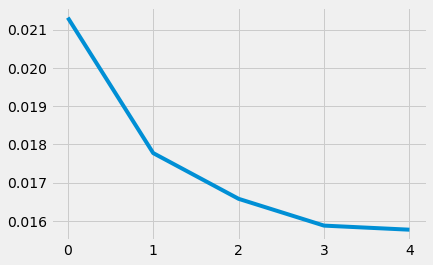

In [68]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)


In [69]:
last_train_batch=scaled_train[-96:]


In [70]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [71]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 126ms/step


array([[0.47210902]], dtype=float32)

In [72]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 46ms/step


In [73]:
test_predictions

[array([0.47210902], dtype=float32),
 array([0.46409208], dtype=float32),
 array([0.4516808], dtype=float32),
 array([0.44000524], dtype=float32),
 array([0.42923313], dtype=float32),
 array([0.4193274], dtype=float32),
 array([0.41023263], dtype=float32),
 array([0.4018894], dtype=float32),
 array([0.39423886], dtype=float32),
 array([0.38722485], dtype=float32),
 array([0.38079515], dtype=float32),
 array([0.37490115], dtype=float32),
 array([0.3694983], dtype=float32),
 array([0.3645457], dtype=float32),
 array([0.3600058], dtype=float32),
 array([0.35584423], dtype=float32),
 array([0.3520295], dtype=float32),
 array([0.3485328], dtype=float32),
 array([0.34532768], dtype=float32),
 array([0.34238988], dtype=float32),
 array([0.3396972], dtype=float32),
 array([0.33722922], dtype=float32),
 array([0.3349673], dtype=float32),
 array([0.33289427], dtype=float32),
 array([0.3309945], dtype=float32),
 array([0.32925346], dtype=float32),
 array([0.327658], dtype=float32),
 array([0.3261

In [74]:
true_predictions=scaler.inverse_transform(test_predictions)


In [75]:
test=test.rename(columns={'0':'actual'})

In [76]:
test['predictions']=true_predictions

<AxesSubplot:xlabel='start'>

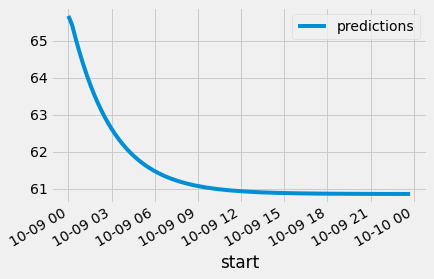

In [77]:
test.plot()

In [56]:
test

,0,predictions
start,,
2023-10-09 04:00:00,68.01,84.070997
2023-10-09 04:15:00,68.98,83.830612
2023-10-09 04:30:00,77.94,83.359365
2023-10-09 04:45:00,62.20,82.815998
2023-10-09 05:00:00,73.32,82.232671
...,...,...
2023-10-09 22:45:00,65.85,67.186022
2023-10-09 23:00:00,62.88,67.186022
2023-10-09 23:15:00,81.40,67.186022
